# **Análise Exploratória Dataset**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()


In [23]:
from google.colab import drive
drive.mount('/content/drive')

# lê o arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/UP/Ciência de Dados/Notebooks/data/Receitas_Base_de_Dados_Limpo.csv',sep=',',encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df.head(10)

,Codigo,Categoria,Origem,Especie,Cod_Exercicio,Data,Tipo,Empresa,Valor,Fonte
0,6000030700000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-31,Extra-Orçamentária,Fundo de Urbanização de Curitiba,61852.58,Retenções em Carater Consignatório
1,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-27,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,308340.99,Recursos Próprios do Fundo de Abastecimento Al...
2,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,5217.80,Recursos Próprios do Fundo de Abastecimento Al...
3,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,5526.10,Recursos Próprios do Fundo de Abastecimento Al...
4,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,4928.86,Recursos Próprios do Fundo de Abastecimento Al...
5,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,6551.02,Recursos Próprios do Fundo de Abastecimento Al...
6,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,8686.75,Recursos Próprios do Fundo de Abastecimento Al...
7,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,7465.99,Recursos Próprios do Fundo de Abastecimento Al...
8,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,7975.66,Recursos Próprios do Fundo de Abastecimento Al...
9,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,6296.41,Recursos Próprios do Fundo de Abastecimento Al...


Primeiramente vereficamos se tudo se mantêm como foi limpo

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90874 entries, 0 to 90873
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         90874 non-null  object 
 1   Categoria      90874 non-null  object 
 2   Origem         90874 non-null  object 
 3   Especie        90874 non-null  object 
 4   Cod_Exercicio  90874 non-null  int64  
 5   Data           90874 non-null  object 
 6   Tipo           90874 non-null  object 
 7   Empresa        90874 non-null  object 
 8   Valor          90874 non-null  float64
 9   Fonte          90874 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 6.9+ MB


Converto o campo de Data novamente pq o Python só não quis manter ☹

In [26]:
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90874 entries, 0 to 90873
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Codigo         90874 non-null  object        
 1   Categoria      90874 non-null  object        
 2   Origem         90874 non-null  object        
 3   Especie        90874 non-null  object        
 4   Cod_Exercicio  90874 non-null  int64         
 5   Data           90874 non-null  datetime64[ns]
 6   Tipo           90874 non-null  object        
 7   Empresa        90874 non-null  object        
 8   Valor          90874 non-null  float64       
 9   Fonte          90874 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [29]:
df.describe()

,Cod_Exercicio,Valor
count,90874.0,9.087400e+04
mean,2022.0,3.620023e+04
std,0.0,5.399988e+05
min,2022.0,1.000000e-02
25%,2022.0,1.039000e+02
50%,2022.0,5.801800e+02
75%,2022.0,3.417188e+03
max,2022.0,4.974237e+07


Como possuo apenas uma coluna de Valores numericos que importa então trabalharei as medidas de disperção em cima do campo 'Valor'

In [30]:
df['Valor'].std()

539998.8339113257

A seguir dou uma verificada em registros que podem de fato serem outliers

In [31]:
df[df['Valor'] <= 5]

,Codigo,Categoria,Origem,Especie,Cod_Exercicio,Data,Tipo,Empresa,Valor,Fonte
50,1321010111060100000000,receitas correntes,receita patrimonial,valores mobiliários,2022,2022-07-21,Orçamentária,Prefeitura Municipal de Curitiba,1.61,Termos de Compromissos - Medidas Compensatórias
52,1321010111060100000000,receitas correntes,receita patrimonial,valores mobiliários,2022,2022-07-21,Orçamentária,Prefeitura Municipal de Curitiba,4.29,Termos de Compromissos - Medidas Compensatórias
53,1321010111060100000000,receitas correntes,receita patrimonial,valores mobiliários,2022,2022-07-21,Orçamentária,Prefeitura Municipal de Curitiba,4.59,Termos de Compromissos - Medidas Compensatórias
55,1321010111060100000000,receitas correntes,receita patrimonial,valores mobiliários,2022,2022-07-21,Orçamentária,Prefeitura Municipal de Curitiba,2.78,Receita de Cooperação - Patrocínio com Vincula...
61,1321010111060100000000,receitas correntes,receita patrimonial,valores mobiliários,2022,2022-07-21,Orçamentária,Prefeitura Municipal de Curitiba,2.52,Recursos Próprios do Fundo Especial da Procura...
...,...,...,...,...,...,...,...,...,...,...
90829,1114511202000000000000,receitas correntes,"impostos, taxas e contribuições de melhoria",impostos,2022,2022-08-05,Orçamentária,Prefeitura Municipal de Curitiba,1.08,Demais Impostos Vinculados à Educação Básica
90830,1114511202000000000000,receitas correntes,"impostos, taxas e contribuições de melhoria",impostos,2022,2022-08-05,Orçamentária,Prefeitura Municipal de Curitiba,2.62,Recursos Ordinários (Livres)
90831,1114511202000000000000,receitas correntes,"impostos, taxas e contribuições de melhoria",impostos,2022,2022-08-05,Orçamentária,Prefeitura Municipal de Curitiba,1.07,Saúde - Receitas Vinculadas (EC 29/00 - 15%)
90832,1114511202000000000000,receitas correntes,"impostos, taxas e contribuições de melhoria",impostos,2022,2022-08-05,Orçamentária,Prefeitura Municipal de Curitiba,1.79,Demais Impostos Vinculados à Educação Básica


In [35]:
df[df['Valor'] >= 5000000]

,Codigo,Categoria,Origem,Especie,Cod_Exercicio,Data,Tipo,Empresa,Valor,Fonte
1829,1711511101000000000000,receitas correntes,transferências correntes,transferências da união e de suas entidades,2022,2022-08-31,Orçamentária,Prefeitura Municipal de Curitiba,6463057.66,Recursos Ordinários (Livres)
2183,1215011101000000000000,receitas correntes,contribuições,contribuições sociais,2022,2022-06-28,Orçamentária,Instituto de Previdência dos Servid. Mun. Curi...,8487941.09,Regime Próprio de Previdência Social - RPPS
2286,1215012100000000000000,receitas correntes,contribuições,contribuições sociais,2022,2022-08-30,Orçamentária,Instituto de Previdência dos Servid. Mun. Curi...,10508142.35,Regime Próprio de Previdência Social - RPPS
2289,1215012100000000000000,receitas correntes,contribuições,contribuições sociais,2022,2022-06-28,Orçamentária,Instituto de Previdência dos Servid. Mun. Curi...,10472080.51,Regime Próprio de Previdência Social - RPPS
4789,1114511101020000000000,receitas correntes,"impostos, taxas e contribuições de melhoria",impostos,2022,2022-08-23,Orçamentária,Prefeitura Municipal de Curitiba,6427348.61,Recursos Ordinários (Livres)
...,...,...,...,...,...,...,...,...,...,...
87546,6000020100000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-30,Extra-Orçamentária,Instituto de Previdência dos Servid. Mun. Curi...,10207475.40,Retenções em Carater Consignatório
87777,1721500101000000000000,receitas correntes,transferências correntes,transferências dos estados e do distrito feder...,2022,2022-08-31,Orçamentária,Prefeitura Municipal de Curitiba,7125312.61,Recursos Ordinários (Livres)
88106,6000020100000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-30,Extra-Orçamentária,Instituto de Previdência dos Servid. Mun. Curi...,9280118.93,Retenções em Carater Consignatório
90343,2999990105030000000000,receitas de capital,outras receitas de capital,demais receitas de capital,2022,2022-07-29,Orçamentária,Fundo Municipal de Habitação de Interesse Social,9353161.36,Receita de Outorga Onerosa do Direito de Const...


# Aqui tiro a Média, Mediana, Moda da variavél valor

In [37]:
round(df['Valor'].mean(),2)

36200.23

In [38]:
df['Valor'].median()

580.1800000000001

Um fato a se observar entre a Média e Mediana é que estão bem dispersadas e com valores discrepantes


In [39]:
df['Valor'].mode()

0    100.0
dtype: float64

# Então verifico com os dados Do gráfico boxplot para identificar outliers

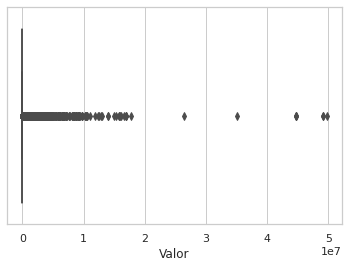

In [41]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df["Valor"])

In [47]:
import plotly.express as px

fig = px.box(df, x="Categoria", y="Valor")
fig.show()

In [44]:
#import plotly.express as px

#fig = px.box(df, x="Categoria", y="Valor", points="all")
#fig.show()

Ao verificar os dados de categorias vemos que os dados estão muito dispersos devido a isto a vizualização do boxplot indica diversos registros fora da caixa dos quartis
Isso se deve a maior parte da identificação de receitas ser entre 0,01 a 1.000.000 dependendo da categoria

realizar a criação de dataframes para analisar mais concretamente os outliers

Primeiramente Verificarei os Valores referente a Categoria "Receita extra-orçamentaria" verificando quantos registros foram considerados dentro dos quartis

In [75]:
df_aux = df

In [76]:
df_aux = df_aux[df_aux['Categoria'] == 'receita extra-orçamentária']

In [77]:
df_aux

,Codigo,Categoria,Origem,Especie,Cod_Exercicio,Data,Tipo,Empresa,Valor,Fonte
0,6000030700000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-31,Extra-Orçamentária,Fundo de Urbanização de Curitiba,61852.58,Retenções em Carater Consignatório
562,6000990201000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-07-25,Extra-Orçamentária,Fundo de Urbanização de Curitiba,18513.34,Retenções em Carater Consignatório
595,6000990202000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-06-06,Extra-Orçamentária,Fundo de Urbanização de Curitiba,2995.57,Retenções em Carater Consignatório
858,6000991109000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-06-29,Extra-Orçamentária,Prefeitura Municipal de Curitiba,11906.39,Retenções em Carater Consignatório
1063,6000030400000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-07-25,Extra-Orçamentária,Instituto de Previdência dos Servid. Mun. Curi...,618.45,Retenções em Carater Consignatório
...,...,...,...,...,...,...,...,...,...,...
90841,6000990204000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-08,Extra-Orçamentária,Fundo de Urbanização de Curitiba,2978.22,Retenções em Carater Consignatório
90842,6000990204000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-09,Extra-Orçamentária,Fundo de Urbanização de Curitiba,4271.82,Retenções em Carater Consignatório
90843,6000990204000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-10,Extra-Orçamentária,Fundo de Urbanização de Curitiba,2534.28,Retenções em Carater Consignatório
90844,6000990201000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-30,Extra-Orçamentária,Fundo de Urbanização de Curitiba,2429434.25,Retenções em Carater Consignatório


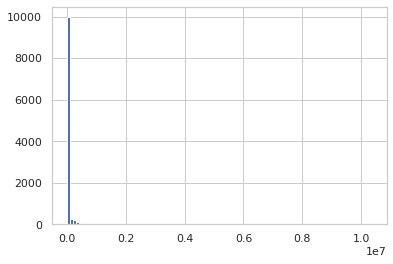

In [78]:
df_aux.Valor.hist(bins=100)

In [79]:
bins = np.histogram_bin_edges(df_aux.Valor, bins='sturges')
bins


array([1.80000000e-01, 6.89513257e+05, 1.37902633e+06, 2.06853941e+06,
       2.75805249e+06, 3.44756556e+06, 4.13707864e+06, 4.82659172e+06,
       5.51610479e+06, 6.20561787e+06, 6.89513095e+06, 7.58464402e+06,
       8.27415710e+06, 8.96367018e+06, 9.65318325e+06, 1.03426963e+07])

Verificado que mesmo utilizando sturges temos valores muitos altos impactando na vizualização dos dados

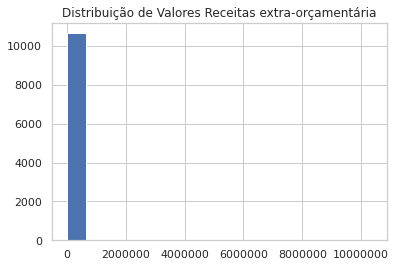

In [80]:
df_aux.Valor.hist(bins=len(bins))
plt.title('Distribuição de Valores Receitas extra-orçamentária')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

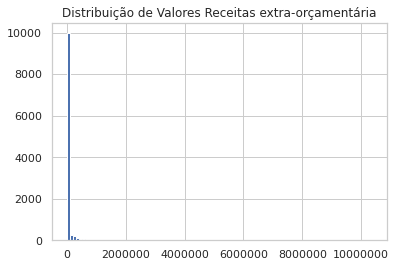

In [81]:
df_aux.Valor.hist(bins=100)
plt.title('Distribuição de Valores Receitas extra-orçamentária')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

A diferença entre o histplot e boxplot é que o boxplot conseguiu demonstrar vizualmente os dados que estão acima de 2M


In [83]:
df_aux = df_aux[df_aux['Valor'] >= 1000000]
df_aux

,Codigo,Categoria,Origem,Especie,Cod_Exercicio,Data,Tipo,Empresa,Valor,Fonte
2190,6000990201000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-29,Extra-Orçamentária,Fundo de Urbanização de Curitiba,1523606.14,Retenções em Carater Consignatório
2191,6000990201000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-29,Extra-Orçamentária,Fundo de Urbanização de Curitiba,1681619.88,Retenções em Carater Consignatório
2192,6000990201000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-29,Extra-Orçamentária,Fundo de Urbanização de Curitiba,1849781.86,Retenções em Carater Consignatório
3494,6000990201000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-30,Extra-Orçamentária,Fundo de Urbanização de Curitiba,2282195.82,Retenções em Carater Consignatório
4138,6000990201000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-25,Extra-Orçamentária,Fundo de Urbanização de Curitiba,1002263.34,Retenções em Carater Consignatório
...,...,...,...,...,...,...,...,...,...,...
88063,6000020100000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-30,Extra-Orçamentária,Instituto de Previdência dos Servid. Mun. Curi...,3539244.44,Retenções em Carater Consignatório
88106,6000020100000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-30,Extra-Orçamentária,Instituto de Previdência dos Servid. Mun. Curi...,9280118.93,Retenções em Carater Consignatório
89935,6000991305000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-07-29,Extra-Orçamentária,Prefeitura Municipal de Curitiba,3091465.57,Retenções em Carater Consignatório
90844,6000990201000000000000,receita extra-orçamentária,desconhecido,desconhecido,2022,2022-08-30,Extra-Orçamentária,Fundo de Urbanização de Curitiba,2429434.25,Retenções em Carater Consignatório


Aqui Filtro para trabalhar com o dataset desconsiderando dados de valores acima de 1 milhão para melhor vizualização nos proximos procedimentos


In [112]:
df = df[df['Valor'] <= 100000]

# A demonstração via Scaterplott não foi possível devido a não possuir mais de uma varíavel numerica

In [113]:
df.corr()

,Cod_Exercicio,Valor
Cod_Exercicio,NaN,NaN
Valor,NaN,1.0


# Testes de Normalidade



In [114]:
df_aux2 = df.loc[df.Categoria == 'receitas correntes']

In [115]:
df_aux2.shape

(77179, 10)

In [116]:
df_aux2.head()

,Codigo,Categoria,Origem,Especie,Cod_Exercicio,Data,Tipo,Empresa,Valor,Fonte
2,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,5217.80,Recursos Próprios do Fundo de Abastecimento Al...
3,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,5526.10,Recursos Próprios do Fundo de Abastecimento Al...
4,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,4928.86,Recursos Próprios do Fundo de Abastecimento Al...
5,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,6551.02,Recursos Próprios do Fundo de Abastecimento Al...
6,1611010102020000000000,receitas correntes,receita de serviços,serviços administrativos e comerciais gerais,2022,2022-07-26,Orçamentária,Fundo de Abastecimento Alimentar de Curitiba,8686.75,Recursos Próprios do Fundo de Abastecimento Al...


primeiramente iremos fazer um teste de normalidade Kolmogorov_Smirnov devido a amostra superar 5000 linhas

In [117]:
import plotly.express as px
grafico =  px.histogram (df_aux2,  x = "Valor", nbins=32, histnorm='percent',) 
grafico.update_layout(width=400,height=400,title_text='Distribuição de valores de Receitas Correntes') 
grafico.show()

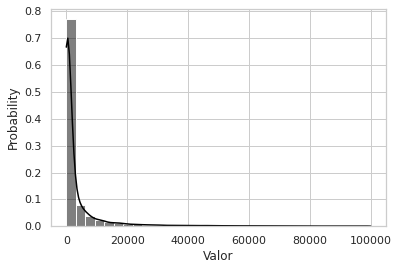

In [118]:
import seaborn as sns
sns.histplot(df, x='Valor', bins=32, color="black", kde=True, stat="probability");

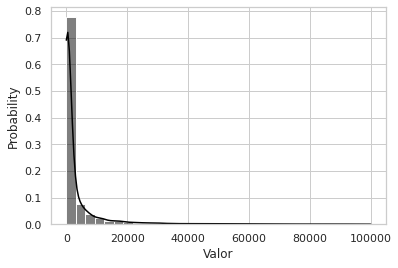

In [119]:
sns.histplot(df_aux2, x='Valor', bins=32, color="black", kde=True, stat="probability");

In [120]:
import scipy.stats as stats
import matplotlib.pyplot as plt

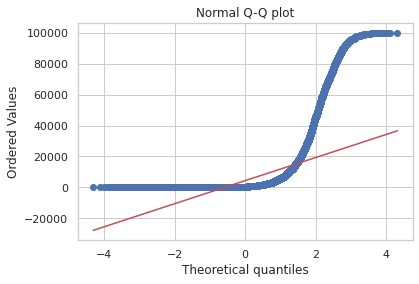

In [121]:
stats.probplot(df['Valor'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

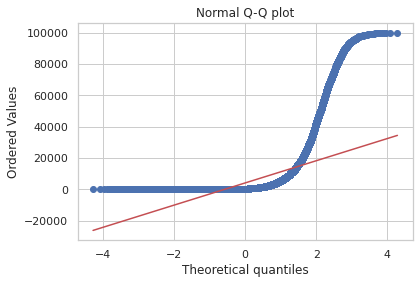

In [122]:
stats.probplot(df_aux2['Valor'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [123]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [124]:
statsmodels.stats.diagnostic.lilliefors(df_aux2.Valor, dist = 'norm')

(0.3554414368509066, 0.0009999999999998899)

In [125]:
statsmodels.stats.diagnostic.lilliefors(df.Valor, dist = 'norm')

(0.3532183984208575, 0.0009999999999998899)

De acordo com  o Teste Ks nem a Amostra nem o DataFrame seguem a distribuição normal


## A Seguir o Teste de Hipótese na qual verificarei se a média de valores da categoria de Receitas Correntes condiz com  a Média de Valores de Receitas da Prefeitura de curitiba

In [126]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [128]:
statsmodels.stats.diagnostic.lilliefors(df_aux2.Valor, dist = 'norm')

(0.3554414368509066, 0.0009999999999998899)

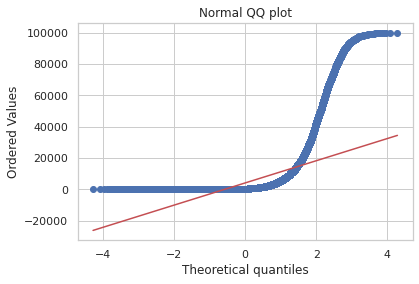

In [129]:
stats.probplot(df_aux2['Valor'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

TESTE MANN WHITNEY

Comparação das medianas dos Valores de Receitas entre a categoria Receitas Correntes e o Df como todo

Ho = NÃO HÁ DIFERENÇA ENTRE AS MEDIANAS DOS VALORES DA CATEGORIA PARA O TODO: p > 0.05

Ha = HÁ DIFERENÇA ENTRE AS MEDIANAS DOS VALORES DA CATEGORIA PARA O TODO : p <= 0.05

In [130]:
stat, p = stats.mannwhitneyu(df.Valor, df_aux2.Valor)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 3460399310.5
p-valor: 4.230571007964732e-21


In [131]:
df_aux2.describe()

,Cod_Exercicio,Valor
count,77179.0,77179.000000
mean,2022.0,4153.860925
std,0.0,11206.312749
min,2022.0,0.010000
25%,2022.0,83.140000
50%,2022.0,459.160000
75%,2022.0,2490.330000
max,2022.0,99989.010000


In [133]:
df.describe()

,Cod_Exercicio,Valor
count,87324.0,87324.000000
mean,2022.0,4415.897552
std,0.0,11724.242689
min,2022.0,0.010000
25%,2022.0,96.877500
50%,2022.0,519.215000
75%,2022.0,2655.600000
max,2022.0,100000.000000


Conclusão: Estatisticamente, com intervalo de confiança de 95%, não se pode concluir que a mediana dos Valores de Receita entre a categoria de Receitas Correntes e o DataSet Inteiro sejam diferentes.